In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [74]:
dataframe = pd.read_csv("/kaggle/input/data-science-job-salaries/ds_salaries.csv")
df = dataframe.copy()
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [75]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [76]:
df.drop(df.columns[0], axis = 1, inplace = True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [78]:
object_variable = df.select_dtypes(include = ["object"]).columns.to_list()

In [79]:
object_variable

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [80]:
df["experience_level"] = pd.Categorical(df["experience_level"])
df["employment_type"] = pd.Categorical(df["employment_type"])
df["job_title"] = pd.Categorical(df["job_title"])
df["salary_currency"] = pd.Categorical(df["salary_currency"])
df["employee_residence"] = pd.Categorical(df["employee_residence"])
df["company_location"] = pd.Categorical(df["company_location"])
df["company_size"] = pd.Categorical(df["company_size"])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    int64   
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    category
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    category
 8   remote_ratio        607 non-null    int64   
 9   company_location    607 non-null    category
 10  company_size        607 non-null    category
dtypes: category(7), int64(4)
memory usage: 31.8 KB


In [82]:
df.describe().T # doesnt show categorical variable

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


### taking care of missing values

In [84]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### EDA

In [85]:
df["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

<AxesSubplot:>

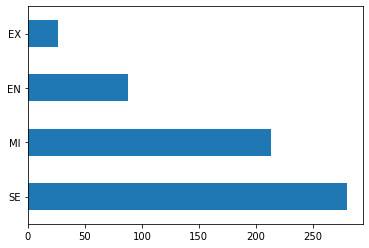

In [86]:
df["experience_level"].value_counts().plot.barh()

In [87]:
df["employment_type"].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [88]:
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
Computer Vision Engineer                      6
BI Data Analyst                               6
ML Engineer                                   6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist                  

In [89]:
df["salary_currency"].value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
DKK      2
BRL      2
HUF      2
MXN      2
SGD      2
AUD      2
CHF      1
CLP      1
Name: salary_currency, dtype: int64

In [90]:
df["employee_residence"].value_counts().head()

US    332
GB     44
IN     30
CA     29
DE     25
Name: employee_residence, dtype: int64

In [91]:
df["company_location"].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
PL      4
PT      4
NL      4
AT      4
MX      3
LU      3
TR      3
PK      3
AE      3
AU      3
BR      3
DK      3
CN      2
CZ      2
BE      2
SI      2
RU      2
NG      2
IT      2
CH      2
NZ      1
CL      1
EE      1
SG      1
UA      1
RO      1
CO      1
MY      1
DZ      1
MT      1
MD      1
KE      1
IR      1
IQ      1
AS      1
IL      1
IE      1
HU      1
HR      1
HN      1
VN      1
Name: company_location, dtype: int64

In [92]:
df["company_size"].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

### encoding categorical data

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    int64   
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    category
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    category
 8   remote_ratio        607 non-null    int64   
 9   company_location    607 non-null    category
 10  company_size        607 non-null    category
dtypes: category(7), int64(4)
memory usage: 31.8 KB


In [94]:
categorical_df = df.select_dtypes(include = ["category"]).columns.to_list()
categorical_df

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

##### experience_level

In [95]:
experience_mapping = {
    "EN":1,
    "MI":2,
    "SE":4,
    "EX":5
}

In [96]:
df['experience_level'] = df['experience_level'].map(experience_mapping)
df['experience_level'].head()

0    2
1    4
2    4
3    2
4    4
Name: experience_level, dtype: category
Categories (4, int64): [1, 5, 2, 4]

##### job title

 we have a lot of similar title, we can reduce it.

In [97]:
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
Computer Vision Engineer                      6
BI Data Analyst                               6
ML Engineer                                   6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist                  

In [98]:
def job_title_organizing(title):
    if ( title.find("Data Science")>=0  or  title.find("Data Scientist")>=0   ):
        df["job_title"].replace(title, "Data Scientist",inplace = True)
    elif(title.find("Data Engineer")>=0 or title.find("Data Engineering")>=0):
        df["job_title"].replace(title, "Data Engineer",inplace = True)
    elif(title.find("Analytics")>=0 or title.find("Analyst")>=0):
        df["job_title"].replace(title, "Data Analyst",inplace = True)
    elif(title.find("ML")>=0 or title.find("Machine")>=0):
        df["job_title"].replace(title, "Machine Learning Engineer",inplace = True)
    elif(title.find("Research")>=0):
        df["job_title"].replace(title, "Research Scientist",inplace = True)
    else:
        df["job_title"].replace(title, "Others",inplace = True)

In [99]:
for title in df["job_title"]:
    job_title_organizing(title)

In [100]:
df["job_title"].value_counts()

Data Scientist               192
Data Engineer                158
Data Analyst                 135
Machine Learning Engineer     68
Others                        37
Research Scientist            17
Name: job_title, dtype: int64

In [101]:

df = pd.get_dummies(df, columns = ["job_title"], prefix = ["job"])
df


,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_Others,job_Data Analyst,job_Data Engineer,job_Data Scientist,job_Machine Learning Engineer,job_Research Scientist
0,2020,2,FT,70000,EUR,79833,DE,0,DE,L,0,0,0,1,0,0
1,2020,4,FT,260000,USD,260000,JP,0,JP,S,0,0,0,0,1,0
2,2020,4,FT,85000,GBP,109024,GB,50,GB,M,0,0,1,0,0,0
3,2020,2,FT,20000,USD,20000,HN,0,HN,S,0,1,0,0,0,0
4,2020,4,FT,150000,USD,150000,US,50,US,L,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,4,FT,154000,USD,154000,US,100,US,M,0,0,1,0,0,0
603,2022,4,FT,126000,USD,126000,US,100,US,M,0,0,1,0,0,0
604,2022,4,FT,129000,USD,129000,US,0,US,M,0,1,0,0,0,0
605,2022,4,FT,150000,USD,150000,US,100,US,M,0,1,0,0,0,0


##### employee_residence & company_location

In [102]:
eu_countries = ["AX","AL","AD","AT","BY","BE","BA","BG","HR","CZ", "DK","EE","FO","FI","FR","DE","GI","GR","GG","VA","HU","IS","IE","IM","IT","JE","LV","LI","LT","LU","MK","MT","MD","MC","NL","NO","PL","PT","RO","RU","SM","RS","SK","SI","ES","SJ","SE","CH","TR","UA","GB"]
asia_countries = ["AF","AM","AZ","BH","BD","BT","IO","BN","KH","CN","CX","CC","CY","GE","HK","IN","ID","IR","IQ","IL","JP","JO","KZ","KP","KR","KW","KG","LA","LB","MO","MY","MV","MN","MM","NP","OM","PK","PS","PH","QA","SA","SG","LK","SY","TW","TJ","TH","TL","TM","AE","UZ","VN","YE"]
america_countries = [" AI ","AG ","AR ","AW","BS ","BZ","BM","BO","BQ","BR","CA","KY","CL","CO","CR","CU","CW","DM","DO","EC","SV","FK","GF","GL","GD","GP","GT","GY","HT","US","UY","VE"]

We divided countries into continents.

In [103]:

def company_location(location):
    if(location in eu_countries):
        df["company_location"].replace(location, "EU",inplace = True)

    elif(location in asia_countries):
        df["company_location"].replace(location, "AS",inplace = True)

    elif(location in america_countries):
        df["company_location"].replace(location, "AME",inplace = True)

    else:
        df["company_location"].replace(location, "OTHERS",inplace = True)


In [104]:

def employee_location(location):
    if(location in eu_countries):
        df["employee_residence"].replace(location, "EU",inplace = True)
    elif(location in asia_countries):
        df["employee_residence"].replace(location, "AS",inplace = True)
    elif(location in america_countries):
        df["employee_residence"].replace(location, "AME",inplace = True)
    else:
        df["employee_residence"].replace(location, "OTHERS",inplace = True)

In [105]:
df["employee_residence"].value_counts().head()

US    332
GB     44
IN     30
CA     29
DE     25
Name: employee_residence, dtype: int64

In [106]:

for location in df["company_location"]:
    company_location(location)


In [107]:
df["company_location"].value_counts()

AME       390
EU        160
OTHERS     56
AS          1
Name: company_location, dtype: int64

In [108]:
for location in df["employee_residence"]:
    employee_location(location)


In [109]:
df["employee_residence"].value_counts()

AME       370
EU        166
AS         57
OTHERS     14
Name: employee_residence, dtype: int64

In [110]:
df = pd.get_dummies(df, columns = ["employee_residence"], prefix = ["empLoc"])
df


,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,job_Others,job_Data Analyst,job_Data Engineer,job_Data Scientist,job_Machine Learning Engineer,job_Research Scientist,empLoc_EU,empLoc_OTHERS,empLoc_AS,empLoc_AME
0,2020,2,FT,70000,EUR,79833,0,EU,L,0,0,0,1,0,0,1,0,0,0
1,2020,4,FT,260000,USD,260000,0,OTHERS,S,0,0,0,0,1,0,0,0,1,0
2,2020,4,FT,85000,GBP,109024,50,EU,M,0,0,1,0,0,0,1,0,0,0
3,2020,2,FT,20000,USD,20000,0,OTHERS,S,0,1,0,0,0,0,0,1,0,0
4,2020,4,FT,150000,USD,150000,50,AME,L,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,4,FT,154000,USD,154000,100,AME,M,0,0,1,0,0,0,0,0,0,1
603,2022,4,FT,126000,USD,126000,100,AME,M,0,0,1,0,0,0,0,0,0,1
604,2022,4,FT,129000,USD,129000,0,AME,M,0,1,0,0,0,0,0,0,0,1
605,2022,4,FT,150000,USD,150000,100,AME,M,0,1,0,0,0,0,0,0,0,1


In [111]:
df = pd.get_dummies(df, columns = ["company_location"], prefix = ["compLoc"])
df


,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,remote_ratio,company_size,job_Others,job_Data Analyst,...,job_Machine Learning Engineer,job_Research Scientist,empLoc_EU,empLoc_OTHERS,empLoc_AS,empLoc_AME,compLoc_EU,compLoc_OTHERS,compLoc_AS,compLoc_AME
0,2020,2,FT,70000,EUR,79833,0,L,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2020,4,FT,260000,USD,260000,0,S,0,0,...,1,0,0,0,1,0,0,1,0,0
2,2020,4,FT,85000,GBP,109024,50,M,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2020,2,FT,20000,USD,20000,0,S,0,1,...,0,0,0,1,0,0,0,1,0,0
4,2020,4,FT,150000,USD,150000,50,L,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,4,FT,154000,USD,154000,100,M,0,0,...,0,0,0,0,0,1,0,0,0,1
603,2022,4,FT,126000,USD,126000,100,M,0,0,...,0,0,0,0,0,1,0,0,0,1
604,2022,4,FT,129000,USD,129000,0,M,0,1,...,0,0,0,0,0,1,0,0,0,1
605,2022,4,FT,150000,USD,150000,100,M,0,1,...,0,0,0,0,0,1,0,0,0,1


##### company size

In [112]:
df["company_size"].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [113]:
size = {"S":1, "M":2, "L":3}

In [114]:
df['company_size'] = df['company_size'].map(size)


##### employment type

In [115]:
df["employment_type"].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [116]:
df = pd.get_dummies(df, columns = ["employment_type"], prefix = ["emp"])
df


,work_year,experience_level,salary,salary_currency,salary_in_usd,remote_ratio,company_size,job_Others,job_Data Analyst,job_Data Engineer,...,empLoc_AS,empLoc_AME,compLoc_EU,compLoc_OTHERS,compLoc_AS,compLoc_AME,emp_CT,emp_FL,emp_FT,emp_PT
0,2020,2,70000,EUR,79833,0,3,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2020,4,260000,USD,260000,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,2020,4,85000,GBP,109024,50,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,2020,2,20000,USD,20000,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,2020,4,150000,USD,150000,50,3,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,4,154000,USD,154000,100,2,0,0,1,...,0,1,0,0,0,1,0,0,1,0
603,2022,4,126000,USD,126000,100,2,0,0,1,...,0,1,0,0,0,1,0,0,1,0
604,2022,4,129000,USD,129000,0,2,0,1,0,...,0,1,0,0,0,1,0,0,1,0
605,2022,4,150000,USD,150000,100,2,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [117]:
df.drop(['salary'], axis = 1, inplace = True)
df.drop(["salary_currency"], axis = 1, inplace = True)


In [118]:
df

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,job_Others,job_Data Analyst,job_Data Engineer,job_Data Scientist,job_Machine Learning Engineer,...,empLoc_AS,empLoc_AME,compLoc_EU,compLoc_OTHERS,compLoc_AS,compLoc_AME,emp_CT,emp_FL,emp_FT,emp_PT
0,2020,2,79833,0,3,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,2020,4,260000,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,2020,4,109024,50,2,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2020,2,20000,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2020,4,150000,50,3,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,4,154000,100,2,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
603,2022,4,126000,100,2,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
604,2022,4,129000,0,2,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
605,2022,4,150000,100,2,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [120]:
df.corr()


,work_year,salary_in_usd,remote_ratio,job_Others,job_Data Analyst,job_Data Engineer,job_Data Scientist,job_Machine Learning Engineer,job_Research Scientist,empLoc_EU,...,empLoc_AS,empLoc_AME,compLoc_EU,compLoc_OTHERS,compLoc_AS,compLoc_AME,emp_CT,emp_FL,emp_FT,emp_PT
work_year,1.000000,0.170493,0.076314,0.010006,0.110490,0.043253,-0.081000,-0.057089,-0.070598,-0.204556,...,-0.188656,0.317641,-0.172177,-0.195056,0.034934,0.273103,-0.053407,-0.047729,0.105342,-0.075845
salary_in_usd,0.170493,1.000000,0.132122,0.005776,-0.101427,0.029373,0.065502,0.003648,-0.022441,-0.379766,...,-0.265421,0.536435,-0.370141,-0.270230,-0.041424,0.506942,0.092907,-0.073863,0.091819,-0.144627
remote_ratio,0.076314,0.132122,1.000000,0.055165,0.065784,0.045619,-0.088587,-0.022182,-0.075039,-0.156572,...,-0.061453,0.187517,-0.151463,-0.114998,0.029039,0.206219,0.065149,-0.016865,-0.023834,-0.002935
job_Others,0.010006,0.005776,0.055165,1.000000,-0.136257,-0.151136,-0.173297,-0.090495,-0.043248,0.013616,...,0.012406,-0.021928,-0.011767,-0.033634,-0.010350,0.032002,-0.023219,0.064356,-0.112379,0.129313
job_Data Analyst,0.110490,-0.101427,0.065784,-0.136257,1.000000,-0.317250,-0.363766,-0.189957,-0.090781,-0.150369,...,-0.063520,0.176294,-0.149124,-0.047292,-0.021725,0.167483,-0.004910,-0.043558,0.050635,-0.038095
job_Data Engineer,0.043253,0.029373,0.045619,-0.151136,-0.317250,1.000000,-0.403489,-0.210700,-0.100694,0.065621,...,-0.049385,-0.025471,0.079699,-0.072350,-0.024097,-0.027541,-0.054062,-0.001911,0.041950,-0.017785
job_Data Scientist,-0.081000,0.065502,-0.088587,-0.173297,-0.363766,-0.403489,1.000000,-0.241594,-0.115458,0.003915,...,0.011785,-0.014775,0.003139,0.027993,0.059722,-0.024842,0.016401,-0.011613,0.020546,-0.032370
job_Machine Learning Engineer,-0.057089,0.003648,-0.022182,-0.090495,-0.189957,-0.210700,-0.241594,1.000000,-0.060292,0.028167,...,0.136352,-0.111885,0.048321,0.139461,-0.014429,-0.127410,0.083211,0.035629,-0.056139,-0.004935
job_Research Scientist,-0.070598,-0.022441,-0.075039,-0.043248,-0.090781,-0.100694,-0.115458,-0.060292,1.000000,0.119865,...,-0.020415,-0.089288,0.079751,0.014893,-0.006895,-0.081723,-0.015470,-0.013825,-0.026829,0.056473
empLoc_EU,-0.204556,-0.379766,-0.156572,0.013616,-0.150369,0.065621,0.003915,0.028167,0.119865,1.000000,...,-0.197511,-0.766587,0.916428,-0.182821,-0.024923,-0.729961,-0.055914,0.041391,-0.059514,0.094808


In [121]:
y = df["salary_in_usd"]
x = df.drop(['salary_in_usd'], axis = 1)

### test-train split

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state= 42)

### Models

In [124]:
models_rmse = {}

In [125]:
from sklearn.model_selection import  GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [129]:
def knn():
    knn_params = {'n_neighbors':np.arange(1,30,1)}
    knn_model = KNeighborsRegressor()
    knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10)
    knn_cv_model.fit(x_train, y_train)
    knn_best_param = knn_cv_model.best_params_["n_neighbors"]

    knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
    knn_tuned.fit(x_train, y_train)
    rmse = np.sqrt(mean_squared_error(y_test, knn_tuned.predict(x_test)))
    print(rmse)
    models_rmse["knn"] = rmse
    print(models_rmse)

In [130]:
knn()

43551.78574599
{'knn': 43551.78574599}


In [131]:
models_rmse

{'knn': 43551.78574599}

In [132]:
def svr():
    svr_rbf = SVR()
    svr_params = { "C": [0.1, 0.4, 5, 10 ,20, 30, 40, 50]}
    svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv = 10)
    svr_cv_model.fit(x_train, y_train)
    best_c = pd.Series(svr_cv_model.best_params_)[0] #svr_cv_model.best_params_ = {'C': x} type

    svr_tuned = SVR(C = best_c).fit(x_train, y_train)
    y_pred = svr_tuned.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    models_rmse["svr"] = rmse


In [134]:
svr()

In [135]:
models_rmse

{'knn': 43551.78574599, 'svr': 62043.68721249396}

In [136]:
def cart_model():
    cart_model = DecisionTreeRegressor() 
    cart_params = {"min_samples_split": range(2,20),
         "max_leaf_nodes": range(2,10)}
    cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
    cart_cv_model.fit(x_train, y_train)
    cart_cv_model.best_params_
    param_mln = cart_cv_model.best_params_["max_leaf_nodes"]
    param_mss = cart_cv_model.best_params_["min_samples_split"]
    
    cart_tuned = DecisionTreeRegressor(max_leaf_nodes = param_mln, min_samples_split =  param_mss)
    cart_tuned.fit(x_train, y_train)
    y_pred = cart_tuned.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    models_rmse["cart"] = rmse
    

In [137]:
cart_model()

In [138]:
models_rmse

{'knn': 43551.78574599, 'svr': 62043.68721249396, 'cart': 44113.35316532903}

In [139]:
def bagged_model():
    bagged_model = BaggingRegressor(bootstrap_features = True)
    bagged_params = {"n_estimators": range(2,30)}
    bagged_cv_model = GridSearchCV(bagged_model, bagged_params, cv = 10)
    bagged_cv_model.fit(x_train, y_train)
    bagged_best_param = pd.Series(bagged_cv_model.best_params_)[0]
    
    bagged_tuned = BaggingRegressor(n_estimators = bagged_best_param)
    bagged_tuned.fit(x_train, y_train)
    y_pred = bagged_tuned.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    models_rmse["bagged"] = rmse
    print("tune rmse", rmse)


In [140]:
bagged_model()

tune rmse 44945.329924203965


In [141]:
models_rmse

{'knn': 43551.78574599,
 'svr': 62043.68721249396,
 'cart': 44113.35316532903,
 'bagged': 44945.329924203965}

In [142]:
def rf_model():
    rf_model = RandomForestRegressor(random_state = 42)
    rf_params = {"max_depth": list(range(1,10)),
                "max_features": [3,5,10,15],
                "n_estimators": [100, 200, 500, 1000, 2000]}
    rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1)
    rf_cv_model.fit(x_train, y_train)
    param_md = pd.Series(rf_cv_model.best_params_)[0]
    param_mf = pd.Series(rf_cv_model.best_params_)[1]
    param_n = pd.Series(rf_cv_model.best_params_)[2]

    rf_tuned = RandomForestRegressor(max_depth = param_md,
                                    max_features = param_mf,
                                    n_estimators = param_n)
    rf_tuned.fit(x_train,y_train)
    y_pred = rf_tuned.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    models_rmse["random forest"] = rmse

In [143]:
rf_model()

In [144]:
models_rmse

{'knn': 43551.78574599,
 'svr': 62043.68721249396,
 'cart': 44113.35316532903,
 'bagged': 44945.329924203965,
 'random forest': 42674.48167504743}

In [145]:
from sklearn.ensemble import GradientBoostingRegressor

In [150]:
def gbm_model():
    gbm_model = GradientBoostingRegressor()
    gbm_params = {
        'learning_rate' : [0.001, 0.01, 0.1, 0.2],
        'max_depth': [3, 5, 8, 50, 100],
        'n_estimators': [200, 500, 1000, 2000],
        'subsample': [1, 0.5, 0.75]
    }
    gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
    gbm_cv_model.fit(x_train, y_train)
    #gbm_cv_model.best_params_
    param_lr = pd.Series(gbm_cv_model.best_params_)[0]
    param_md = int(pd.Series(gbm_cv_model.best_params_)[1]) # it was float and gbm model doesnt accept that
    param_n = int(pd.Series(gbm_cv_model.best_params_)[2])
    param_s = pd.Series(gbm_cv_model.best_params_)[3]

    gbm_tuned = GradientBoostingRegressor(learning_rate = param_lr, 
                                          max_depth = param_md, 
                                          n_estimators = param_n, 
                                          subsample = param_s).fit(x_train, y_train)

    y_pred = gbm_tuned.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    models_rmse["gbm"] = rmse

In [151]:
gbm_model()

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.75; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, subsample=1; total time=   

In [152]:

models_rmse

{'knn': 43551.78574599,
 'svr': 62043.68721249396,
 'cart': 44113.35316532903,
 'bagged': 44945.329924203965,
 'random forest': 42674.48167504743,
 'gbm': 43441.30902668348}

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [158]:
def mlp_model():
    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    mlp_model = MLPRegressor(hidden_layer_sizes = (100, 20)).fit(x_train_scaled, y_train)
    mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.005],
                 'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
                 "activation": ["relu", "logistic"]}
    mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)
    mlp_cv_model.fit(x_train_scaled, y_train)

    param_act = pd.Series(mlp_cv_model.best_params_)["activation"]
    param_alp = pd.Series(mlp_cv_model.best_params_)["alpha"]
    param_hls = pd.Series(mlp_cv_model.best_params_)["hidden_layer_sizes"]

    mlp_tuned = MLPRegressor(alpha = param_alp, hidden_layer_sizes = param_hls, activation = param_act)
    mlp_tuned.fit(x_train_scaled, y_train)
    y_pred = mlp_tuned.predict(x_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    models_rmse["mlp"] = rmse

In [159]:
mlp_model()


[CV] END learning_rate=0.2, max_depth=8, n_estimators=2000, subsample=1; total time=   2.8s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=2000, subsample=1; total time=   2.9s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=2000, subsample=1; total time=   2.8s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=2000, subsample=0.5; total time=   2.6s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=2000, subsample=0.5; total time=   2.7s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=2000, subsample=0.75; total time=   2.9s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=2000, subsample=0.75; total time=   3.0s
[CV] END learning_rate=0.2, max_depth=8, n_estimators=2000, subsample=0.75; total time=   3.0s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=50, n_estimators=200, su

In [160]:
models_rmse

{'knn': 43551.78574599,
 'svr': 62043.68721249396,
 'cart': 44113.35316532903,
 'bagged': 44945.329924203965,
 'random forest': 42674.48167504743,
 'gbm': 43441.30902668348,
 'mlp': 45607.84722402783}

final model is random forest

In [161]:
rf_model = RandomForestRegressor(random_state = 42)
rf_params = {"max_depth": list(range(1,10)),
                "max_features": [3,5,10,15],
                "n_estimators": [100, 200, 500, 1000, 2000]}
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1)
rf_cv_model.fit(x, y)
param_md = pd.Series(rf_cv_model.best_params_)[0]
param_mf = pd.Series(rf_cv_model.best_params_)[1]
param_n = pd.Series(rf_cv_model.best_params_)[2]

rf_tuned = RandomForestRegressor(max_depth = param_md, max_features = param_mf, n_estimators = param_n)
   